# A short demo of the capabilities of Jupyter Notebooks

Most of the code for this project was developed and run in these interactive jupyter notebooks. Each can contain code or text, and they can be run individually. Jupyter supports many different programming languages, but I'm using Python.

In [43]:
# This is a code cell. We can execute python statements, and the output is shown beneath the cell
a = 5
b = 7
a + b

12

In [44]:
a = 67%5
a+b # the variable b persists from the previous cell

9

There are all sorts of tricks we can do. For example, with a bit of %magic we can see the output of plot commands inline:

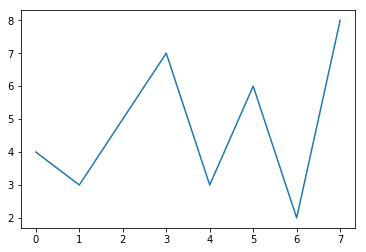

In [45]:
from matplotlib import pyplot as plt
%matplotlib inline

x = [4, 3, 5, 7, 3, 6, 2, 8]
plt.plot(x)

It's often used for interacting with data - especially in the data science field. The pandas library is great for structured data. Here, I'll load up some readings taken with the ring of 8

In [46]:
import pandas as pd

df = pd.read_csv('r8_small_rotation.csv')
df.head() # Shows the first few rows

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Y
0,853,854,882,873,874,907,897,875,867,854,...,852,856,873,883,863,873,872,872,846,0
1,860,854,882,872,871,876,881,876,866,854,...,854,855,896,889,863,897,871,875,854,0
2,860,853,882,874,870,874,868,876,867,854,...,854,855,874,864,865,874,870,872,854,0
3,861,854,885,873,870,874,881,877,868,854,...,854,856,874,885,863,877,871,874,854,0
4,859,854,882,873,871,897,881,877,866,854,...,854,855,874,888,898,903,872,874,845,0


We can see info about the different columns or manipulate the data very easily:

In [47]:
df['0'].describe()

count    450.000000
mean     857.608889
std        2.261897
min      846.000000
25%      856.000000
50%      858.000000
75%      859.000000
max      862.000000
Name: 0, dtype: float64

In [48]:
df['new column'] = df['0']<df['0'].mean()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,Y,new column
0,853,854,882,873,874,907,897,875,867,854,...,856,873,883,863,873,872,872,846,0,True
1,860,854,882,872,871,876,881,876,866,854,...,855,896,889,863,897,871,875,854,0,False
2,860,853,882,874,870,874,868,876,867,854,...,855,874,864,865,874,870,872,854,0,False
3,861,854,885,873,870,874,881,877,868,854,...,856,874,885,863,877,871,874,854,0,False
4,859,854,882,873,871,897,881,877,866,854,...,855,874,888,898,903,872,874,845,0,False


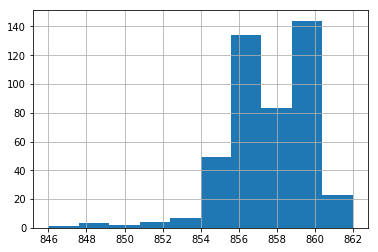

In [49]:
df['0'].hist()

And so on.

With the data in this format, we can very easily plug it into different models or tools and see the result:

In [52]:
df = pd.read_csv('r8_small_rotation.csv')
X = df.drop('Y', axis=1)
y = df['Y']

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlpc = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=400)
mlpc.fit(X_train, y_train)
print('Score: ',mlpc.score(X_test, y_test))

Score:  0.9380530973451328


We can also show images, create interactive plots or figures, animate cells, embedd 3D visuals...

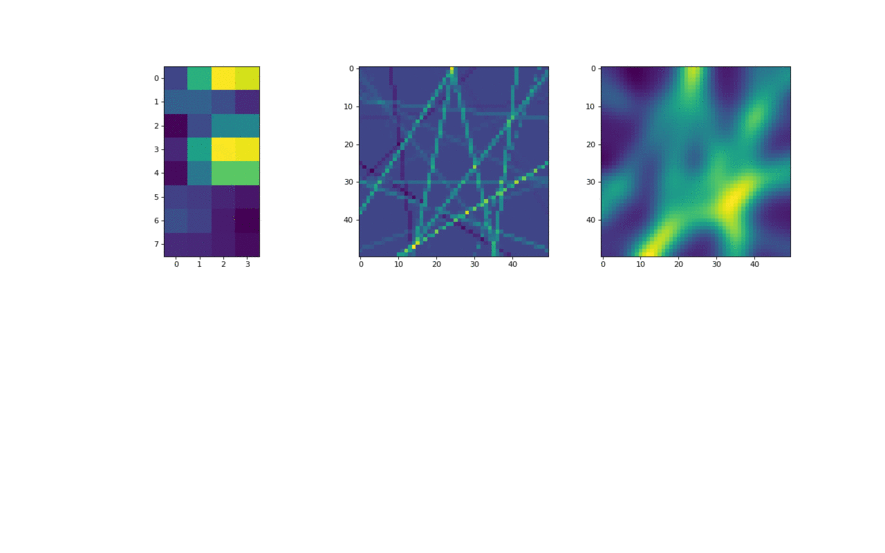

In [51]:
from IPython.display import Image
Image('r8_recon_circle.gif')

This is a pretty useful tool. Some cool notebooks that give a better overview of what this can be used for: https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks
